## Import the relevant libraries

In [27]:
import numpy as np
import pandas as pd
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## from minimal example part 1

In [6]:
obs = 100
xs = np.random.uniform(low=-10,high=10,size = (obs,1))
zs = np.random.uniform(low=-10,high=10,size = (obs,1))
inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(obs,1))
targets = 2*xs - 3*zs+5 +noise

#initialization of weights
init_range = 0.1
weights = np.random.uniform(-init_range,init_range,(2,1))
bias = np.random.uniform(-init_range,init_range,(1,1))
learning_rate = 0.02

#gradient descent
for i in range(1,1000):
    outputs = np.dot(inputs,weights) + bias
    deltas = outputs - targets
    cost = np.sum(deltas**2)/2/obs
    deltas_scaled = deltas / obs
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    bias = bias - learning_rate * np.sum(deltas_scaled)
    

print("weights", weights)
print("bias", bias)


weights [[ 2.00525935]
 [-3.01462856]]
bias [[5.02632597]]


(2, 1)


## Linear Regression Practical Example

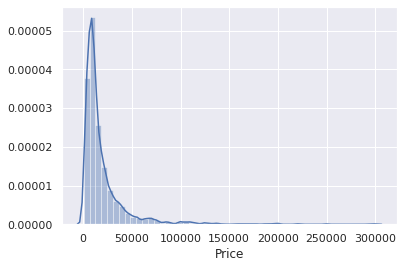

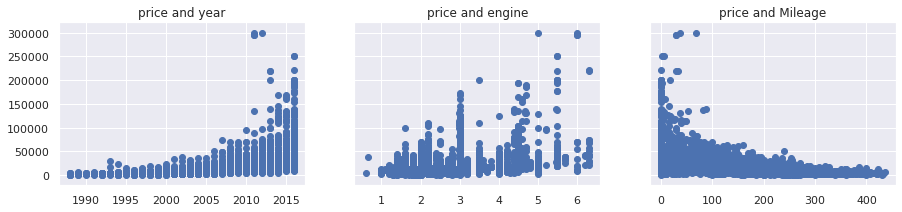

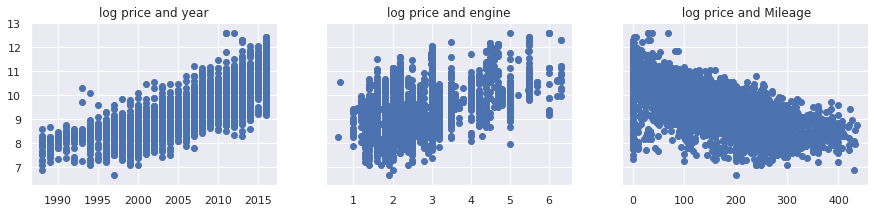

           Mileage      EngineV         Year    log_price
count  3908.000000  3908.000000  3908.000000  3908.000000
mean    159.000000     2.474956  2006.794780     9.443901
std      96.331657     0.978763     6.129926     0.914350
min       0.000000     0.600000  1988.000000     6.684612
25%      89.750000     1.800000  2003.000000     8.888584
50%     155.500000     2.200000  2008.000000     9.375855
75%     225.000000     3.000000  2012.000000     9.998798
max     435.000000     6.300000  2016.000000    12.611538
         VIF features
0   3.700541  Mileage
1  10.317095     Year
2   7.401772  EngineV
         VIF          features
1   7.720146           EngineV
16  9.672979  Registration_yes


In [13]:
# load 
row_data = pd.read_csv('1.04. Real-life example.csv')
row_data.head()


#preproces
data = row_data.drop(['Model'],axis=1)
# missing values
data.describe(include='all')
data.isnull()
data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv.describe()
# ploting variables
sns.distplot(data_no_mv['Price'])
# edge values deleted
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe()
q = data_1['Mileage'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Mileage']<q]
data_2.describe()
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe(include = 'all')
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
data_4.describe(include = 'all')
#reset index
data_cleaned = data_4.reset_index(drop='True')

#checking ols assumptions
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("price and year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title("price and engine")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title("price and Mileage")
plt.show()

#log transformation
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

#after log transformation
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title("log price and year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title("log price and engine")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title(" log price and Mileage")
plt.show()


data_cleaned = data_cleaned.drop(['Price'],axis=1)
# model using stats model
print(data_cleaned.describe())
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["features"] = variables.columns
print(vif)

data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)

#Create dummy variables
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first= True)

# rearange the data
data_with_dummies.columns.values
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]


variables = data_preprocessed.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["features"] = variables.columns
print(vif[vif['VIF']>6] )



### Linear regression

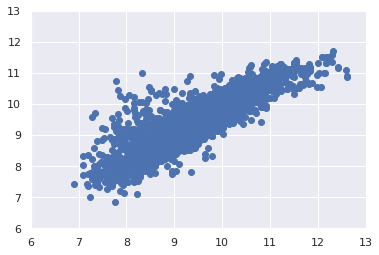

               features   weights
0               Mileage -0.475741
1               EngineV  0.254070
2             Brand_BMW  0.020619
3   Brand_Mercedes-Benz  0.029854
4      Brand_Mitsubishi -0.133047
5         Brand_Renault -0.167869
6          Brand_Toyota -0.052847
7      Brand_Volkswagen -0.076261
8            Body_hatch -0.137283
9            Body_other -0.092741
10           Body_sedan -0.191643
11           Body_vagon -0.110295
12             Body_van -0.159250
13      Engine Type_Gas -0.121432
14    Engine Type_Other -0.029656
15   Engine Type_Petrol -0.138629
16     Registration_yes  0.314726


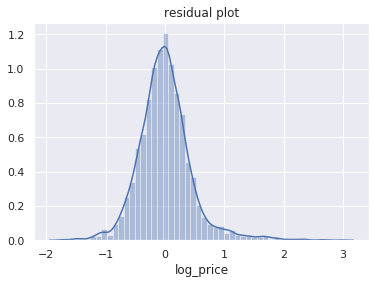

In [17]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis = 1)

#scale the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)


#  train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

#regression
reg = LinearRegression()
reg.fit(x_train,y_train)

#predicion
y_hat=reg.predict(x_train)

plt.scatter(y_train,y_hat)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#score , errors
reg.score(inputs_scaled,target)
error = y_hat-y_train
sns.distplot(error)
plt.title("residual plot")

#summary table
summery_reg = pd.DataFrame(inputs.columns.values,columns=["features"])
summery_reg['weights']=reg.coef_
print(summery_reg)

#test the modle
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test, alpha=0.2)
test_error = y_hat_test - y_test
sns.distplot(test_error)

#interpreting the model- in the notebook

## multiple linear regression

In [23]:
data = pd.read_csv('1.02.Multiple-linear-regression (1).csv')
x = data[['SAT','Rand 1,2,3']]
y=data['GPA']
reg = LinearRegression()
reg.fit(x,y)
R = reg.score(x,y)
n=x.shape[0]
p = x.shape[1]
R_adj= 1 - (1-R)*(n-1)/(n-p-1)

from sklearn.feature_selection import f_regression
f_regression(x,y)
p_value = f_regression(x,y)[1].round(3)

reg_summary = pd.DataFrame(data = x.columns.values, columns=['featuers'])
reg_summary['coefficients'] = reg.coef_
reg_summary['p_value'] = p_value

print("reg_summary:")
display(reg_summary)

#Standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
scaled_reg = LinearRegression()
scaled_reg.fit(x_scaled,y)

scaled_reg_summery = pd.DataFrame(['intercept' , 'SAT' , 'Rand 1, 2, 3'], columns = ['features'])
scaled_reg_summery['weights'] = scaled_reg.intercept_, scaled_reg.coef_[0], scaled_reg.coef_[1]
print("scaled_reg_summery:")
display(scaled_reg_summery)

#prediction
new_data = pd.DataFrame([[1700,2],[1800,1]], columns=['SAT','rand'])
new_data_scaled = scaler.transform(new_data)




reg_summary:


,featuers,coefficients,p_value
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


scaled_reg_summery:


,features,weights
0,intercept,3.330238
1,SAT,0.171814
2,"Rand 1, 2, 3",-0.007030


## logistic regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Feb 2020   Pseudo R-squ.:                  0.7992
Time:                        12:47:09   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Feb 2020   Pseudo R-squ.:                  0.8249
Time:                        12:47:09   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

predictions:
[0.00 1.00 1.00 0.23 0.02 0.99 1.00 1.00 1.00 0.01 1.00 1.00 0.76 0.00
 0.60 1.00 0.11 0.12 0.51 1.00 1.00 1.00 0.00 0.01 0.97 1.00 0.48 0.99
 1.00 0.99 0.00 0.83 0.25 1.00 1.00 1.00 0.31 1.00 0.23 0.00 0.02 0.45
 1.00 0.00 0.99 0.00 0.99 0.00 0.00 0.01 0.00 1.00 0.92 0.02 1.00 0.00
 0.37 0.98 0.12 1.00 0.00 0.78 1.00 1.00 0.98 0.00 0.00 0.00 1.00 0.00
 0.78 0.12 0.00 0.99 1.00 1.00 0.00 0.30 1.00 1.00 0.00 1.00 1.00 0.85
 1.00 1.00 0.00 1.00 1.00 0.89 0.83 0.00 0.98 0.97 0.00 1.00 1.00 0.03
 0.99 0.96 1.00 0.00 1.00 0.01 0.01 1.00 1.00 1.00 0.00 0.00 0.02 0.33
 0.00 1.00 0.09 0.00 0.97 0.00 0.75 1.00 1.00 0.01 0.01 0.00 1.00 0.00
 0.99 0.57 0.54 0.87 0.83 0.00 1.00 0.00 0.00 0.00 1.00 0.04 0.00 0.01
 1.00 0.99 0.52 1.00 1.00 0.05 0.00 0.00 0.00 0.68 1.00 1.00 1.00 1.00
 1.00 0.00 1.00 1.00 0.04 1.00 0.02 1.00 0.99 0.97 0.94 0.01 0.00 0.00]
confusion matrix:


array([[69.00, 5.00],
       [4.00, 90.00]])

,predict 0,predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


accuracy_train:  0.9464285714285714
0     4.416867e-07
1     9.742731e-01
2     9.941557e-01
3     9.781306e-01
4     3.215089e-01
5     3.814192e-02
6     9.797226e-01
7     9.991287e-01
8     9.999936e-01
9     7.308682e-01
10    9.999987e-01
11    9.999999e-01
12    8.638537e-01
13    6.007566e-05
14    8.493951e-01
15    9.999426e-01
16    3.173552e-04
17    4.065056e-03
18    9.998485e-01
dtype: float64
[[5.00 1.00]
 [1.00 12.00]]
cm of test:


array([[5.00, 1.00],
       [1.00, 12.00]])

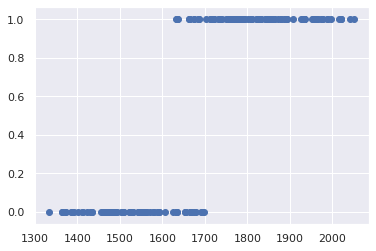

In [37]:
import statsmodels.api as sm




row_data= pd.read_csv('2.01. Admittance.csv')
data= row_data.copy()
data['Admitted']= data['Admitted'].map({'Yes':1,'No':0})
y  = data['Admitted']
x1 = data['SAT']
plt.scatter(x1,y)
x= sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
reg_summary = results_log.summary()
display(reg_summary)


data = pd.read_csv('2.02. Binary predictors.csv')
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
y = data['Admitted']
x1 = data[['SAT','Gender']]
x= sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
reg_summary = results_log.summary()
display(reg_summary)

#prediction + confusion matrix
print("predictions:")
print(results_log.predict())
print("confusion matrix:")
display(results_log.pred_table())
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns=['predict 0','predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
display(cm_df)

cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
print("accuracy_train: " ,accuracy_train)


#test data 
test_data = pd.read_csv('2.03. Test dataset.csv')
test_data['Admitted']=test_data['Admitted'].map({'Yes':1,'No':0})
test_data['Gender']=test_data['Gender'].map({'Female':1,'Male':0})
test_x = test_data[['SAT','Gender']]
test_x = sm.add_constant(test_x)
test_actual = test_data['Admitted']
test_data = test_data.drop(['Admitted'], axis = 1)
test_data=sm.add_constant(test_data)
test_data = test_data[x.columns.values]

def confusion_matrix(data,actual_values,model):
    
    pred_values = model.predict(data)
    print(pred_values)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    print(cm)
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm , accuracy

cm , accuracy = confusion_matrix(test_data,test_actual,results_log) 
print("cm of test:")
display(cm)

## useful staff

In [ ]:
#suffel data (from business case)

shuffled_indices = np.arange(unscaled_input_all.shape[0])
print(shuffled_indices)
np.random.shuffle(shuffled_indices)
print(shuffled_indices)
shuffled_inputs_all = uscaled_input_all[shuffled_indices]
shuffled_targets_all = targets_all[shuffled_indices]


#scale inputs

from sklearn import preprocessing
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

#split the dataset into train, validation an test¶
sample_count = targets_equal_priors.shape[0]
train_samples_count = int(0.8*sample_count)
validation_samples_count = int(0.1*sample_count)
test_samples_count = sample_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets =shuffled_targets[:train_samples_count]

validation_inputs= shuffled_inputs[train_samples_count:train_samples_count+validation_sample_count]
validation_targets =  shuffled_targets[train_samples_count:train_samples_count+validation_sample_count]

test_inputs =  shuffled_inputs[train_samples_count+validation_sample_count:]
test_targets =  shuffled_targets[train_samples_count+validation_sample_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)



#absenteeism at work

targets = np.where(data_preprocessed['Absenteeism Time in Hours']>3,1,0)


In [ ]:
#kagle tutorial 
melbourne_data = melbourne_data.dropna(axis=0)

# selecting featuers
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

melbourne_model = DecisionTreeRegressor(random_state=1)
melbourne_model.fit(X, y)
predictions = iowa_model.predict(X)

error_table['error^2'] = error_table['error'].pow(2)
print(error_table['error^2'].sum())
display(error_table.sort_values('error^2',ascending=False))

from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

#different values for max leaf nodes
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    
    
#choosing lowest error
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
best_result = 100000000000
best_max_leaf = 0
for max_leaf_node in candidate_max_leaf_nodes:
    current_result = get_mae(max_leaf_node,train_X, val_X, train_y, val_y)
    if current_result<best_result:
        best_result = current_result
        best_max_leaf = max_leaf_node
        
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

In [ ]:
print("Validation MAE: {:,.0f}".format(val_mae))

In [ ]:
# intermidiate machine learning course
##missing values
#1. drop columns with missing values

# Fill in the lines below: drop columns in training and validation data
reduced_X_train = X_train[[col for col in X_train.columns if X_train[col].isnull().sum()==0]]

# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]



missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

#2. replace missing values with mean

from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))
# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

#3.impute the missing values, while also keeping track of which values were imputed


# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

#fill missing values with 0
import numpy as np 
masvnrarrea = np.array(final_X_train['MasVnrArea'].fillna(0))
final_X_train['MasVnrArea'] = masvnrarrea

GarageYrBlt = np.array(final_X_train['GarageYrBlt'].fillna(final_X_train['YearBuilt']))
final_X_train['GarageYrBlt'] = GarageYrBlt

#fill na most frequent
df = X_test[low_cardinality_cols]
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
s= df.isnull().sum()
s[s>0]
df = X_test[low_cardinality_cols]
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
s= df.isnull().sum()
s[s>0]

In [ ]:
#categorical variables:

# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
 # or
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]


#label encoding
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])



# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))




#one hot encoding

# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# Apply one-hot encoder to each column with categorical data
# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
#piplines

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#Define the Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)


from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

In [ ]:
#selecting columns to use

import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [ ]:
# extreme gradient boosting

from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))


In [ ]:
expenditures_cardholders = X.expenditure[y]
expenditures_noncardholders = X.expenditure[~y]

print('Fraction of those who did not receive a card and had no expenditures: %.2f' \
      %((expenditures_noncardholders == 0).mean()))
print('Fraction of those who received a card and had no expenditures: %.2f' \
      %(( expenditures_cardholders == 0).mean()))